In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


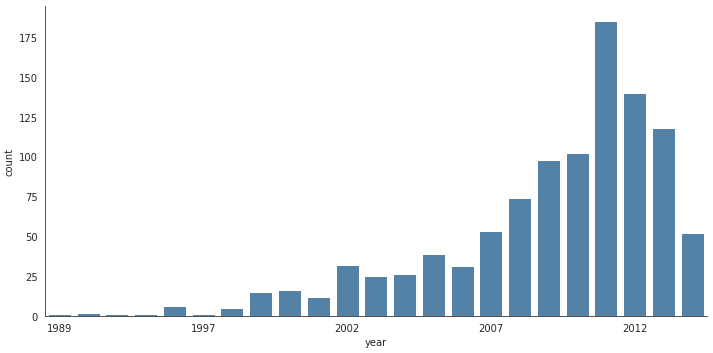

In [5]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data = planets, aspect = 2,
                       kind = 'count', color = 'steelblue')
    g.set_xticklabels(step=5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


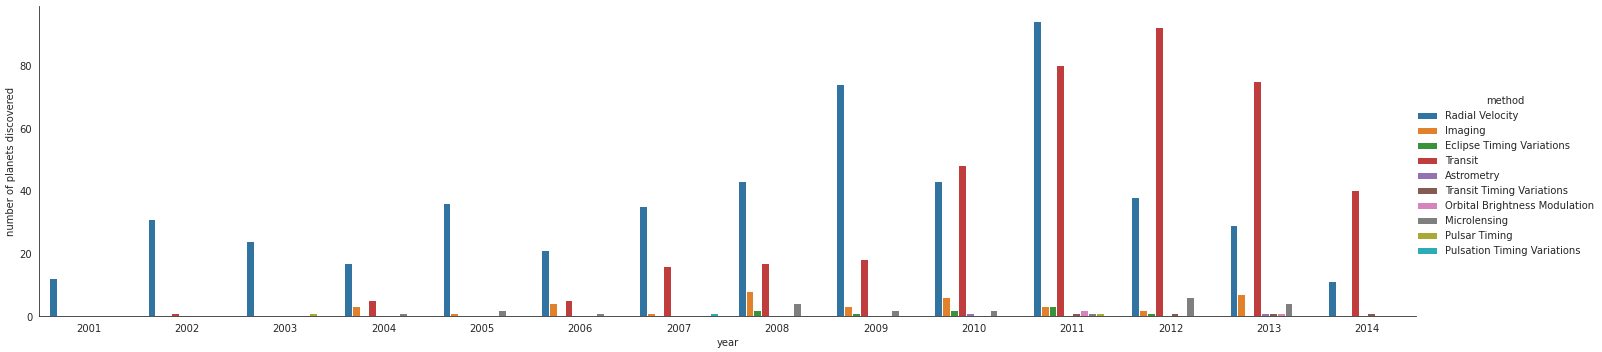

In [6]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data = planets, aspect = 4.0,
                       kind = 'count', hue = 'method', order = range(2001, 2015))
    g.set_ylabels('number of planets discovered')

## Marathon data 예제

In [9]:
data = pd.read_csv("marathon-data.csv")
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [10]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [21]:
## 시간 데이터 변환 

from datetime import timedelta, date, datetime
import pandas as pd 

In [28]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours = h, minutes = m, seconds = s)

In [31]:
data = pd.read_csv("marathon-data.csv", converters = {'split':convert_time, 'final':convert_time})

AttributeError: type object 'datetime.datetime' has no attribute 'timedelta'

In [25]:

data.dtypes()

TypeError: 'Series' object is not callable